<img src="imgs/GeorgiaTech_RGB.png" alt="GeorgiaTech_RGB" width="200" style="float: left;"/>
<br><br><br>

# <span style='color:#B3A369'> <b>Clean and Consolidate Battery Data</b> </span>

> <b> Notebook Author:</b> Brian Keith (bkeith9@gatech.edu) <br>
> 
> **Based on codes provided by authors of paper at:**
> - https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation/blob/master/Load%20Data.ipynb
> 
> **Data Citation:**
> - Severson et al. Data-driven prediction of battery cycle life before capacity degradation. Nature Energy volume 4, pages 383–391 (2019)
> - Downloaded from: https://data.matr.io/1/projects/5c48dd2bc625d700019f3204
>   - Batch 1 (`2017-05-12_batchdata_updated_struct_errorcorrect.mat`): https://data.matr.io/1/projects/5c48dd2bc625d700019f3204/batches/5c86c0b5fa2ede00015ddf67
>   - Batch 2 (`2017-06-30_batchdata_updated_struct_errorcorrect.mat`): https://data.matr.io/1/projects/5c48dd2bc625d700019f3204/batches/5c86bf14fa2ede00015ddd83
>   - Batch 3 (`2018-04-12_batchdata_updated_struct_errorcorrect.mat`): https://data.matr.io/1/projects/5c48dd2bc625d700019f3204/batches/5c86bd64fa2ede00015ddbb3

## <span style='color:#003057'> Initial Tasks </span>

In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pathlib
from IPython.display import display, Markdown
import datetime as dt
curr_time = dt.datetime.today().strftime('%Y-%m-%d %H%M')
from timeit import default_timer as timer

def printmd(string):
    header_map = {1:'#B3A369',2:'#003057',3:'#54585A'}
    if string.startswith('#'):
        nh = string.count('#')
        string = string.replace('#','')
        display(Markdown('#'*nh + f' <span style="color:{header_map[nh]}">{string}</span>'))
    else:
        display(Markdown(string))

## <span style='color:#003057'> Load Batch Data </span>

In [2]:
with open (r'data\batch1.pkl', 'rb') as fp:
    batch1 = pickle.load(fp)

with open (r'data\batch2.pkl', 'rb') as fp:
    batch2 = pickle.load(fp)

with open (r'data\batch3.pkl', 'rb') as fp:
    batch3 = pickle.load(fp)

## <span style='color:#003057'> Data handling </span>

> Some data handling was done by the reseachers to remove bad data as well as to consolidate some of the continued runs between batch 1 and batch 2. This code does that data handling.

In [3]:
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())
print(f'Batch 1 has {numBat1} batteries')

# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]

for i, bk in enumerate(batch1_keys):
    # print(bk)
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    
    for j in batch1[bk]['summary'].keys():
        # print(j)
        # print(batch2_keys[i])
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    
    last_cycle = len(batch1[bk]['cycles'].keys())
    
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())
print(f'Batch 2 has {numBat2} batteries')

# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

numBat3 = len(batch3.keys())
print(f'Batch 3 has {numBat3} batteries')



Batch 1 has 41 batteries
Batch 2 has 43 batteries
Batch 3 has 40 batteries


## <span style='color:#003057'> Consolidate Cleaned Batch Data </span>

In [4]:
bat_dict = {**batch1, **batch2, **batch3}
printmd(f'## All Batch Data ({numBat1 + numBat2 + numBat3} batteries)')
print(list(bat_dict.keys()))

pkl_name = f'data/CleanedConsolidatedBatches.pkl'
with open(pkl_name,'wb') as fp:
    pickle.dump(bat_dict,fp)
printmd('### Pickle File Saved as ' + pkl_name)

## <span style="color:#003057"> All Batch Data (124 batteries)</span>

['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30', 'b3c31'

### <span style="color:#54585A"> Pickle File Saved as data/CleanedConsolidatedBatches.pkl</span>

## <span style='color:#003057'> Misc - Visualization </span>

> This is just to ensure the visualization of the data matched the one from the researchers in their code.

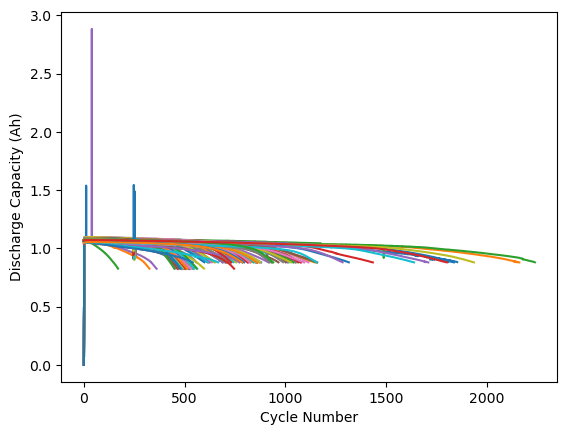

In [5]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')
plt.show()

## <span style='color:#003057'> Extract Summary Information </span>

> This code was not included by the researchers. After some analysis, it was clear that there are two sets of data of interest, the summary and cycle data. This code consolidates the data to only include the summary information for each batch and cycle.

In [6]:

dfs_summary = []

for pk in bat_dict.keys():
    tmp_life = bat_dict[pk]['cycle_life'][0][0]
    tmp_policy = bat_dict[pk]['charge_policy']
    
    tmp_summary = pd.DataFrame(bat_dict[pk]['summary'])
    tmp_summary.insert(0,'batch',pk)
    tmp_summary.insert(1,'charge_policy',tmp_policy)
    tmp_summary.insert(2,'cycle_life',tmp_life)
    dfs_summary.append(tmp_summary)

summary = pd.concat(dfs_summary, ignore_index=True)
display(summary)
summary.info(memory_usage='deep')

sum_tmap = {
    'batch': 'category',
    'charge_policy': 'category',
    'cycle_life': np.int16,
    'IR': np.float64,
    'QC': np.float64,
    'QD': np.float64,
    'Tavg': np.float64,
    'Tmin': np.float64,
    'Tmax': np.float64,
    'chargetime': np.float64,
    'cycle': np.int16,
}

summary = summary.astype(sum_tmap)

summary.info(memory_usage='deep')

summary_df_name = f'data/SummaryData.pkl'
summary.to_pickle(summary_df_name)
printmd('### Summary Data Saved as Saved as ' + summary_df_name)

,batch,charge_policy,cycle_life,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
0,b1c0,3.6C(80%)-3.6C,1852.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,b1c0,3.6C(80%)-3.6C,1852.0,0.016742,1.071042,1.070689,31.875011,29.566130,35.652016,13.341250,2.0
2,b1c0,3.6C(80%)-3.6C,1852.0,0.016724,1.071674,1.071900,31.931490,29.604385,35.692978,13.425777,3.0
3,b1c0,3.6C(80%)-3.6C,1852.0,0.016681,1.072304,1.072510,31.932603,29.744202,35.680588,13.425167,4.0
4,b1c0,3.6C(80%)-3.6C,1852.0,0.016662,1.072970,1.073174,31.959322,29.644709,35.728691,13.341442,5.0
...,...,...,...,...,...,...,...,...,...,...,...
100496,b3c45,4.8C(80%)-4.8C-newstructure,1801.0,0.017538,0.881796,0.881539,32.532753,30.328932,34.571934,15.404138,1796.0
100497,b3c45,4.8C(80%)-4.8C-newstructure,1801.0,0.017294,0.881874,0.881441,32.679857,29.591684,35.492989,15.497987,1797.0
100498,b3c45,4.8C(80%)-4.8C-newstructure,1801.0,0.017605,0.881364,0.880883,32.217071,31.470758,33.999550,16.357937,1798.0
100499,b3c45,4.8C(80%)-4.8C-newstructure,1801.0,0.017526,0.881120,0.880757,33.035630,29.526152,35.779078,16.046140,1799.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100501 entries, 0 to 100500
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   batch          100501 non-null  object 
 1   charge_policy  100501 non-null  object 
 2   cycle_life     100501 non-null  float64
 3   IR             100501 non-null  float64
 4   QC             100501 non-null  float64
 5   QD             100501 non-null  float64
 6   Tavg           100501 non-null  float64
 7   Tmin           100501 non-null  float64
 8   Tmax           100501 non-null  float64
 9   chargetime     100501 non-null  float64
 10  cycle          100501 non-null  float64
dtypes: float64(9), object(2)
memory usage: 20.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100501 entries, 0 to 100500
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   batch          100501 non-null  category
 1 

### <span style="color:#54585A"> Summary Data Saved as Saved as data/SummaryData.pkl</span>

## <span style='color:#003057'> Extract Cycle Information </span>

> This code was not included by the researchers. After some analysis, it was clear that there are two sets of data of interest, the summary and cycle data. This code consolidates the detailed cycle data for each batch and cycle.

### <span style='color:#54585A'> Delete All Unnecessary Data Before Proceeding </span>

> This block is here to delete all previous variables that are not needed for the rest of the notebook. This is because the next portion of the code uses a massive amount of memory (~52 GB on my machine).
>
> This process is repeated again before saving the files out to again reduce the memory load.

In [7]:
#free up as much memory as possible before next step
try:
    del batch1
    gc.collect()
except:
    pass
try:
    del batch2
    gc.collect()
except:
    pass
try:
    del batch3
    gc.collect()
except:
    pass
try:
    del summary
    gc.collect()
except:
    pass
try:
    del dfs_summary
    gc.collect()
except:
    pass

### <span style='color:#54585A'> Create DataFrame for Measured and Derived Data </span>

In [8]:

# columns of the measured data
meas_cols = ['I','Qc','Qd','T','V','t']
#? derived columns have different lengths than measured columns (all 1,000) they will need to be dealt with separately
#? https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation/issues/27
derive_cols = ['Qdlin','Tdlin','dQdV',]

def get_length(cell):
    """Get the length of an array/list in a cell
    
    Args:
        cell (list or np.ndarray): cell to get the length of
    
    Returns:
        int: length of the cell. 0 if not a list or array.
    """
    return len(cell) if isinstance(cell, list) or isinstance(cell,np.ndarray) else 0


measured_data_dfs = []
derived_data_dfs = []

s_loop = timer()
cnt = 0
for batch_key in bat_dict.keys():
    printmd(f'### <b>Processing data for: {batch_key}</b>')
    
    #! check for array lengths to ensure they are all the same for a given row (cycle)
    print(f'Checking for issues with length of cycle arrays...')
    tmp_array_data = pd.DataFrame(bat_dict[batch_key]['cycles']).T
    
    array_lens = tmp_array_data.map(get_length)

    meas_lens = array_lens[meas_cols]
    derive_lens = array_lens[derive_cols]

    #? check if all the lengths are the same
    if meas_lens.nunique(axis=1).sum() != meas_lens.shape[0]:
        raise ValueError(f'{batch_key} has different lengths for measured columns {meas_cols}')

    if derive_lens.nunique(axis=1).sum() != derive_lens.shape[0]:
        raise ValueError(f'{batch_key} has different lengths for derived columns {derive_cols}')
    
    print('\tValues for all columns in a given cycle have arrays are the same length. Continuing...')
    
    print(f'Exploding arrays into rows and storing cycle...')
    tmp_meas = tmp_array_data[meas_cols]
    tmp_derive = tmp_array_data[derive_cols]
    
    expl_meas_dfs = []
    for index, row in tmp_meas.iterrows():
        tmp_expl_meas = pd.DataFrame(row).T.explode(meas_cols)
        tmp_expl_meas.insert(0,'CycleIdx',int(index)+1)
        expl_meas_dfs.append(tmp_expl_meas)

    expl_meas = pd.concat(expl_meas_dfs, ignore_index=True)
    expl_meas.insert(0,'batch',batch_key)

    expl_derive_dfs = []
    for index, row in tmp_derive.iterrows():
        tmp_expl_derive = pd.DataFrame(row).T.explode(derive_cols)
        tmp_expl_derive.insert(0,'CycleIdx',int(index)+1)
        expl_derive_dfs.append(tmp_expl_derive)
    
    expl_derive = pd.concat(expl_derive_dfs, ignore_index=True)
    expl_derive.insert(0,'batch',batch_key)
    
    print('\tTotal number of rows in measured data:',f'{expl_meas.shape[0]:,}')
    print('\tTotal number of rows in derived data:',f'{expl_derive.shape[0]:,}')
    
    runtime = str(dt.timedelta(seconds=np.round((timer()-s_loop), 2))).rstrip("0")
    print(f'Total runtime: {runtime}')
    
    
    measured_data_dfs.append(expl_meas)
    derived_data_dfs.append(expl_derive)
    
    if cnt == 0:
        printmd('**Example of handling performed for a single cycle and batch**')
        
        print('Raw Data (All):')
        display(tmp_array_data)
        
        print('Array Length Mapping (Measured):')
        display(meas_lens)
        
        print('Array Length Mapping (Derived):')
        display(derive_lens)
        
        print('Exploded Measured Data:')
        display(expl_meas)
        
        print('Exploded Derived Data:')
        display(expl_derive)
        
        cnt += 1
    
    printmd('---')

printmd('## <b>Combining Measured & Derived Data</b>')
measured_data = pd.concat(measured_data_dfs, ignore_index=True)
derived_data = pd.concat(derived_data_dfs, ignore_index=True)

printmd('### <b>Measured Data</b>')
display(measured_data)
measured_data.info(memory_usage='deep')

printmd('### <b>Derived Data</b>')
display(derived_data)
derived_data.info(memory_usage='deep')

total_runtime = str(dt.timedelta(seconds=np.round((timer()-s_loop), 2))).rstrip("0")
printmd(f'## All Data Processed in {total_runtime}')

### <span style="color:#54585A"> <b>Processing data for: b1c0</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,936,644
	Total number of rows in derived data: 1,850,002
Total runtime: 0:00:06.24


**Example of handling performed for a single cycle and batch**

Raw Data (All):


,I,Qc,Qd,Qdlin,T,Tdlin,V,dQdV,t
0,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]"
1,"[0.0, 0.21590752727272727, 0.3598308545454545,...","[0.0, 1.0935055e-06, 1.0935055e-06, 1.0935055e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00035743169172071344, -0.00031852458675475...","[31.632496, 31.632496, 31.632496, 31.632496, 3...","[29.585882115781974, 29.585889890630046, 29.58...","[2.0264158, 2.0393877, 2.0516596, 2.0630703, 2...","[-0.01269011993883918, -0.01269011993883918, -...","[0.0, 0.0024166666666739427, 0.002911666666659..."
2,"[0.0, 0.2159846909090909, 0.39595430909090906,...","[0.0, 2.1892861e-06, 2.1892861e-06, 2.1892861e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0003798085051063239, -0.000349296036017368...","[31.712118, 31.642683, 31.642683, 31.642683, 3...","[29.645995720295176, 29.645996341146088, 29.64...","[2.0264654, 2.0391855, 2.0548534, 2.0668211, 2...","[0.0, 0.0, 0.0, -0.0001205143244502763, -9.373...","[0.0, 0.0024866666666639504, 0.002989999999984..."
3,"[0.0, 0.2157774818181818, 0.3601186909090909, ...","[0.0, 3.5126993e-10, 3.5126993e-10, 3.5126993e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00034664050996769205, -0.00030765716078066...","[31.620401, 31.618505, 31.618505, 31.618505, 3...","[29.744202517029763, 29.744202352704704, 29.74...","[2.0254135, 2.0385513, 2.0506926, 2.0621805, 2...","[-0.005111738067271755, -0.003948040695798245,...","[0.0, 0.002541666666669092, 0.0030000000000048..."
4,"[0.0, 0.2160713909090909, 0.3960115272727272, ...","[0.0, 1.4893225e-06, 1.4893225e-06, 1.4893225e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00037102355649936325, -0.00032921416080221...","[31.814196, 31.814196, 31.814196, 31.814196, 3...","[29.621225424314172, 29.62840559151371, 29.634...","[2.0245466, 2.0373793, 2.0533218, 2.0652456, 2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00...","[0.0, 0.002484999999978754, 0.0030183333332994..."
...,...,...,...,...,...,...,...,...,...
1846,"[0.0, 0.18007711818181815, 0.3599643727272727,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1805856e-05, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.000368957979760066, -0.0003303087749448706...","[33.230957, 33.252869, 33.252869, 33.252869, 3...","[31.137816250764793, 31.13781645176324, 31.137...","[2.0182428, 2.0283432, 2.0433197, 2.0553179, 2...","[0.0, 0.0, 0.0, -0.0017375641222407575, -0.005...","[0.0, 0.002538333332631737, 0.0030349999996057..."
1847,"[0.0, 0.17994273636363634, 0.32404466363636364...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0005361036659395283, -0.000493413157419082...","[31.196554, 31.168356, 31.168356, 31.168356, 3...","[28.956433911874836, 28.95643392898498, 28.956...","[2.0186205, 2.0289431, 2.0408869, 2.0524855, 2...","[-0.021427543002214677, -0.020100966148739317,...","[0.0, 0.0024316666667194417, 0.002873333333021..."
1848,"[0.0, 0.25214195454545457, 0.43192689999999995...","[0.0, 2.5690929e-06, 2.5690929e-06, 2.5690929e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0003789834679669762, -0.000340945642056505...","[32.182819, 32.182819, 32.182819, 32.182819, 3...","[30.318500841419464, 30.318500885202255, 30.31...","[2.018465, 2.0339508, 2.0515919, 2.0649662, 2....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0025783333333341337, 0.003111666666666..."
1849,"[0.0, 0.21583730909090906, 0.36018111818181814...","[0.0, 2.8016209e-06, 2.8016209e-06, 1.0089959e...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.0004762586628410943, -0.000431648379298407...","[32.688221, 32.717159, 32.717159, 32.717159, 3...","[30.358992219776944, 30.358638911859238, 30.35...","[2.0188541, 2.0314713, 2.0439901, 2.0603561, 2...","[-0.006598907200909048, -0.006598907200909048,...","[0.0, 0.002634999999994155, 0.0031149999999949..."


Array Length Mapping (Measured):


,I,Qc,Qd,T,V,t
0,2,2,2,2,2,2
1,1087,1087,1087,1087,1087,1087
2,1117,1117,1117,1117,1117,1117
3,1114,1114,1114,1114,1114,1114
4,1138,1138,1138,1138,1138,1138
...,...,...,...,...,...,...
1846,929,929,929,929,929,929
1847,878,878,878,878,878,878
1848,879,879,879,879,879,879
1849,869,869,869,869,869,869


Array Length Mapping (Derived):


,Qdlin,Tdlin,dQdV
0,2,2,2
1,1000,1000,1000
2,1000,1000,1000
3,1000,1000,1000
4,1000,1000,1000
...,...,...,...
1846,1000,1000,1000
1847,1000,1000,1000
1848,1000,1000,1000
1849,1000,1000,1000


Exploded Measured Data:


,batch,CycleIdx,I,Qc,Qd,T,V,t
0,b1c0,1,0,0,0,0,0,0
1,b1c0,1,0,0,0,0,0,0
2,b1c0,2,0.0,0.0,0.0,31.632496,2.026416,0.0
3,b1c0,2,0.215908,0.000001,0.0,31.632496,2.039388,0.002417
4,b1c0,2,0.359831,0.000001,0.0,31.632496,2.05166,0.002912
...,...,...,...,...,...,...,...,...
1936639,b1c0,1851,-0.021138,0.884042,0.882802,32.46542,1.999766,40.202787
1936640,b1c0,1851,-0.019945,0.884042,0.882808,32.46542,2.000397,40.226328
1936641,b1c0,1851,-0.019945,0.884042,0.882808,32.46542,2.001862,40.227417
1936642,b1c0,1851,-0.019945,0.884042,0.882808,32.46542,2.011937,40.237738


Exploded Derived Data:


,batch,CycleIdx,Qdlin,Tdlin,dQdV
0,b1c0,1,0,0,0
1,b1c0,1,0,0,0
2,b1c0,2,-0.000357,29.585882,-0.01269
3,b1c0,2,-0.000319,29.58589,-0.01269
4,b1c0,2,-0.000282,29.585896,-0.01269
...,...,...,...,...,...
1849997,b1c0,1851,0.85067,35.516961,-0.071163
1849998,b1c0,1851,0.850694,35.517119,-0.080123
1849999,b1c0,1851,0.85072,35.517087,-0.065267
1850000,b1c0,1851,0.850747,35.516805,-0.035128


---

### <span style="color:#54585A"> <b>Processing data for: b1c1</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 2,267,975
	Total number of rows in derived data: 2,158,002
Total runtime: 0:00:13.45


---

### <span style="color:#54585A"> <b>Processing data for: b1c2</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 2,370,992
	Total number of rows in derived data: 2,235,002
Total runtime: 0:00:20.96


---

### <span style="color:#54585A"> <b>Processing data for: b1c3</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,497,539
	Total number of rows in derived data: 1,432,002
Total runtime: 0:00:25.72


---

### <span style="color:#54585A"> <b>Processing data for: b1c4</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,753,307
	Total number of rows in derived data: 1,707,002
Total runtime: 0:00:31.42


---

### <span style="color:#54585A"> <b>Processing data for: b1c5</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,107,307
	Total number of rows in derived data: 1,072,002
Total runtime: 0:00:34.95


---

### <span style="color:#54585A"> <b>Processing data for: b1c6</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 660,310
	Total number of rows in derived data: 634,002
Total runtime: 0:00:37.14


---

### <span style="color:#54585A"> <b>Processing data for: b1c7</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 910,990
	Total number of rows in derived data: 868,002
Total runtime: 0:00:40.09


---

### <span style="color:#54585A"> <b>Processing data for: b1c9</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,110,015
	Total number of rows in derived data: 1,052,002
Total runtime: 0:00:43.63


---

### <span style="color:#54585A"> <b>Processing data for: b1c11</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 835,014
	Total number of rows in derived data: 786,002
Total runtime: 0:00:46.2


---

### <span style="color:#54585A"> <b>Processing data for: b1c14</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 911,264
	Total number of rows in derived data: 878,002
Total runtime: 0:00:49.06


---

### <span style="color:#54585A"> <b>Processing data for: b1c15</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 752,979
	Total number of rows in derived data: 717,002
Total runtime: 0:00:51.52


---

### <span style="color:#54585A"> <b>Processing data for: b1c16</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 896,661
	Total number of rows in derived data: 860,002
Total runtime: 0:00:54.45


---

### <span style="color:#54585A"> <b>Processing data for: b1c17</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 891,614
	Total number of rows in derived data: 855,002
Total runtime: 0:00:57.29


---

### <span style="color:#54585A"> <b>Processing data for: b1c18</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 857,172
	Total number of rows in derived data: 689,002
Total runtime: 0:00:59.67


---

### <span style="color:#54585A"> <b>Processing data for: b1c19</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 822,929
	Total number of rows in derived data: 786,002
Total runtime: 0:01:02.56


---

### <span style="color:#54585A"> <b>Processing data for: b1c20</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 530,553
	Total number of rows in derived data: 532,002
Total runtime: 0:01:04.27


---

### <span style="color:#54585A"> <b>Processing data for: b1c21</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 562,135
	Total number of rows in derived data: 557,002
Total runtime: 0:01:06.07


---

### <span style="color:#54585A"> <b>Processing data for: b1c23</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,067,097
	Total number of rows in derived data: 1,012,002
Total runtime: 0:01:09.35


---

### <span style="color:#54585A"> <b>Processing data for: b1c24</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,062,853
	Total number of rows in derived data: 1,015,002
Total runtime: 0:01:12.78


---

### <span style="color:#54585A"> <b>Processing data for: b1c25</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 898,484
	Total number of rows in derived data: 852,002
Total runtime: 0:01:15.57


---

### <span style="color:#54585A"> <b>Processing data for: b1c26</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 922,650
	Total number of rows in derived data: 868,002
Total runtime: 0:01:18.32


---

### <span style="color:#54585A"> <b>Processing data for: b1c27</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 886,894
	Total number of rows in derived data: 840,002
Total runtime: 0:01:20.97


---

### <span style="color:#54585A"> <b>Processing data for: b1c28</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 894,161
	Total number of rows in derived data: 858,002
Total runtime: 0:01:23.82


---

### <span style="color:#54585A"> <b>Processing data for: b1c29</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 941,922
	Total number of rows in derived data: 915,002
Total runtime: 0:01:26.76


---

### <span style="color:#54585A"> <b>Processing data for: b1c30</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 745,668
	Total number of rows in derived data: 707,002
Total runtime: 0:01:29


---

### <span style="color:#54585A"> <b>Processing data for: b1c31</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 914,143
	Total number of rows in derived data: 874,002
Total runtime: 0:01:31.74


---

### <span style="color:#54585A"> <b>Processing data for: b1c32</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 756,891
	Total number of rows in derived data: 729,002
Total runtime: 0:01:34.09


---

### <span style="color:#54585A"> <b>Processing data for: b1c33</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 784,009
	Total number of rows in derived data: 755,002
Total runtime: 0:01:36.47


---

### <span style="color:#54585A"> <b>Processing data for: b1c34</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 779,968
	Total number of rows in derived data: 740,002
Total runtime: 0:01:38.88


---

### <span style="color:#54585A"> <b>Processing data for: b1c35</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 745,965
	Total number of rows in derived data: 701,002
Total runtime: 0:01:41.21


---

### <span style="color:#54585A"> <b>Processing data for: b1c36</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 748,601
	Total number of rows in derived data: 702,002
Total runtime: 0:01:43.48


---

### <span style="color:#54585A"> <b>Processing data for: b1c37</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 685,170
	Total number of rows in derived data: 646,002
Total runtime: 0:01:45.65


---

### <span style="color:#54585A"> <b>Processing data for: b1c38</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 634,781
	Total number of rows in derived data: 615,002
Total runtime: 0:01:47.76


---

### <span style="color:#54585A"> <b>Processing data for: b1c39</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 647,051
	Total number of rows in derived data: 623,002
Total runtime: 0:01:49.94


---

### <span style="color:#54585A"> <b>Processing data for: b1c40</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,042,943
	Total number of rows in derived data: 964,002
Total runtime: 0:01:53.49


---

### <span style="color:#54585A"> <b>Processing data for: b1c41</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,103,390
	Total number of rows in derived data: 1,049,002
Total runtime: 0:01:57.01


---

### <span style="color:#54585A"> <b>Processing data for: b1c42</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 729,740
	Total number of rows in derived data: 700,002
Total runtime: 0:01:59.41


---

### <span style="color:#54585A"> <b>Processing data for: b1c43</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 677,268
	Total number of rows in derived data: 649,002
Total runtime: 0:02:01.59


---

### <span style="color:#54585A"> <b>Processing data for: b1c44</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 600,046
	Total number of rows in derived data: 614,002
Total runtime: 0:02:03.58


---

### <span style="color:#54585A"> <b>Processing data for: b1c45</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 588,451
	Total number of rows in derived data: 597,002
Total runtime: 0:02:05.57


---

### <span style="color:#54585A"> <b>Processing data for: b2c0</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 474,880
	Total number of rows in derived data: 326,000
Total runtime: 0:02:06.73


---

### <span style="color:#54585A"> <b>Processing data for: b2c1</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 236,884
	Total number of rows in derived data: 170,000
Total runtime: 0:02:07.32


---

### <span style="color:#54585A"> <b>Processing data for: b2c2</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 622,809
	Total number of rows in derived data: 464,000
Total runtime: 0:02:08.95


---

### <span style="color:#54585A"> <b>Processing data for: b2c3</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 591,495
	Total number of rows in derived data: 361,000
Total runtime: 0:02:10.22


---

### <span style="color:#54585A"> <b>Processing data for: b2c4</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 651,133
	Total number of rows in derived data: 471,000
Total runtime: 0:02:11.84


---

### <span style="color:#54585A"> <b>Processing data for: b2c5</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 654,779
	Total number of rows in derived data: 507,000
Total runtime: 0:02:13.51


---

### <span style="color:#54585A"> <b>Processing data for: b2c6</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 873,738
	Total number of rows in derived data: 545,000
Total runtime: 0:02:15.45


---

### <span style="color:#54585A"> <b>Processing data for: b2c10</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 779,801
	Total number of rows in derived data: 596,000
Total runtime: 0:02:17.6


---

### <span style="color:#54585A"> <b>Processing data for: b2c11</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 665,704
	Total number of rows in derived data: 505,000
Total runtime: 0:02:19.55


---

### <span style="color:#54585A"> <b>Processing data for: b2c12</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 667,577
	Total number of rows in derived data: 491,000
Total runtime: 0:02:21.42


---

### <span style="color:#54585A"> <b>Processing data for: b2c13</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 748,863
	Total number of rows in derived data: 520,000
Total runtime: 0:02:23.35


---

### <span style="color:#54585A"> <b>Processing data for: b2c14</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 653,871
	Total number of rows in derived data: 509,000
Total runtime: 0:02:25.48


---

### <span style="color:#54585A"> <b>Processing data for: b2c17</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 688,994
	Total number of rows in derived data: 525,000
Total runtime: 0:02:27.69


---

### <span style="color:#54585A"> <b>Processing data for: b2c18</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 725,091
	Total number of rows in derived data: 523,000
Total runtime: 0:02:29.5


---

### <span style="color:#54585A"> <b>Processing data for: b2c19</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 691,731
	Total number of rows in derived data: 489,000
Total runtime: 0:02:31.33


---

### <span style="color:#54585A"> <b>Processing data for: b2c20</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 679,029
	Total number of rows in derived data: 531,000
Total runtime: 0:02:33.18


---

### <span style="color:#54585A"> <b>Processing data for: b2c21</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 678,554
	Total number of rows in derived data: 520,000
Total runtime: 0:02:35.01


---

### <span style="color:#54585A"> <b>Processing data for: b2c22</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 702,819
	Total number of rows in derived data: 540,000
Total runtime: 0:02:36.93


---

### <span style="color:#54585A"> <b>Processing data for: b2c23</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 755,497
	Total number of rows in derived data: 562,000
Total runtime: 0:02:38.85


---

### <span style="color:#54585A"> <b>Processing data for: b2c24</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 626,607
	Total number of rows in derived data: 524,000
Total runtime: 0:02:40.62


---

### <span style="color:#54585A"> <b>Processing data for: b2c25</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 584,403
	Total number of rows in derived data: 487,000
Total runtime: 0:02:42.2


---

### <span style="color:#54585A"> <b>Processing data for: b2c26</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 599,587
	Total number of rows in derived data: 498,000
Total runtime: 0:02:43.92


---

### <span style="color:#54585A"> <b>Processing data for: b2c27</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 642,124
	Total number of rows in derived data: 495,000
Total runtime: 0:02:45.51


---

### <span style="color:#54585A"> <b>Processing data for: b2c28</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 693,024
	Total number of rows in derived data: 541,000
Total runtime: 0:02:47.37


---

### <span style="color:#54585A"> <b>Processing data for: b2c29</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 667,928
	Total number of rows in derived data: 522,000
Total runtime: 0:02:49.06


---

### <span style="color:#54585A"> <b>Processing data for: b2c30</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 655,160
	Total number of rows in derived data: 507,000
Total runtime: 0:02:50.73


---

### <span style="color:#54585A"> <b>Processing data for: b2c31</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 655,003
	Total number of rows in derived data: 519,000
Total runtime: 0:02:52.49


---

### <span style="color:#54585A"> <b>Processing data for: b2c32</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 685,761
	Total number of rows in derived data: 544,000
Total runtime: 0:02:54.4


---

### <span style="color:#54585A"> <b>Processing data for: b2c33</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 684,303
	Total number of rows in derived data: 546,000
Total runtime: 0:02:56.29


---

### <span style="color:#54585A"> <b>Processing data for: b2c34</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 647,526
	Total number of rows in derived data: 526,000
Total runtime: 0:02:57.95


---

### <span style="color:#54585A"> <b>Processing data for: b2c35</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 600,872
	Total number of rows in derived data: 486,000
Total runtime: 0:02:59.54


---

### <span style="color:#54585A"> <b>Processing data for: b2c36</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 727,947
	Total number of rows in derived data: 560,000
Total runtime: 0:03:01.39


---

### <span style="color:#54585A"> <b>Processing data for: b2c37</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 643,371
	Total number of rows in derived data: 502,000
Total runtime: 0:03:03.02


---

### <span style="color:#54585A"> <b>Processing data for: b2c38</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 617,462
	Total number of rows in derived data: 487,000
Total runtime: 0:03:04.75


---

### <span style="color:#54585A"> <b>Processing data for: b2c39</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 606,633
	Total number of rows in derived data: 480,000
Total runtime: 0:03:06.38


---

### <span style="color:#54585A"> <b>Processing data for: b2c40</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 720,208
	Total number of rows in derived data: 530,000
Total runtime: 0:03:08.23


---

### <span style="color:#54585A"> <b>Processing data for: b2c41</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 681,188
	Total number of rows in derived data: 452,000
Total runtime: 0:03:09.77


---

### <span style="color:#54585A"> <b>Processing data for: b2c42</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 677,931
	Total number of rows in derived data: 492,000
Total runtime: 0:03:11.54


---

### <span style="color:#54585A"> <b>Processing data for: b2c43</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 676,098
	Total number of rows in derived data: 487,000
Total runtime: 0:03:13.13


---

### <span style="color:#54585A"> <b>Processing data for: b2c44</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 676,297
	Total number of rows in derived data: 479,000
Total runtime: 0:03:14.77


---

### <span style="color:#54585A"> <b>Processing data for: b2c45</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 666,519
	Total number of rows in derived data: 514,000
Total runtime: 0:03:16.58


---

### <span style="color:#54585A"> <b>Processing data for: b2c46</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 651,402
	Total number of rows in derived data: 449,000
Total runtime: 0:03:18.26


---

### <span style="color:#54585A"> <b>Processing data for: b2c47</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,116,723
	Total number of rows in derived data: 745,000
Total runtime: 0:03:20.74


---

### <span style="color:#54585A"> <b>Processing data for: b3c0</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 739,224
	Total number of rows in derived data: 1,008,000
Total runtime: 0:03:24.07


---

### <span style="color:#54585A"> <b>Processing data for: b3c1</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 764,976
	Total number of rows in derived data: 1,062,000
Total runtime: 0:03:27.47


---

### <span style="color:#54585A"> <b>Processing data for: b3c3</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 805,165
	Total number of rows in derived data: 1,114,000
Total runtime: 0:03:31.06


---

### <span style="color:#54585A"> <b>Processing data for: b3c4</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 781,540
	Total number of rows in derived data: 1,047,000
Total runtime: 0:03:34.49


---

### <span style="color:#54585A"> <b>Processing data for: b3c5</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 603,918
	Total number of rows in derived data: 827,000
Total runtime: 0:03:37.08


---

### <span style="color:#54585A"> <b>Processing data for: b3c6</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 566,346
	Total number of rows in derived data: 666,000
Total runtime: 0:03:39.19


---

### <span style="color:#54585A"> <b>Processing data for: b3c7</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,376,281
	Total number of rows in derived data: 1,835,000
Total runtime: 0:03:44.95


---

### <span style="color:#54585A"> <b>Processing data for: b3c8</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 621,179
	Total number of rows in derived data: 827,000
Total runtime: 0:03:47.68


---

### <span style="color:#54585A"> <b>Processing data for: b3c9</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 792,025
	Total number of rows in derived data: 1,038,000
Total runtime: 0:03:51


---

### <span style="color:#54585A"> <b>Processing data for: b3c10</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 813,183
	Total number of rows in derived data: 1,077,000
Total runtime: 0:03:54.56


---

### <span style="color:#54585A"> <b>Processing data for: b3c11</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 634,412
	Total number of rows in derived data: 816,000
Total runtime: 0:03:57.61


---

### <span style="color:#54585A"> <b>Processing data for: b3c12</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 720,092
	Total number of rows in derived data: 931,000
Total runtime: 0:04:00.78


---

### <span style="color:#54585A"> <b>Processing data for: b3c13</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 628,900
	Total number of rows in derived data: 815,000
Total runtime: 0:04:03.34


---

### <span style="color:#54585A"> <b>Processing data for: b3c14</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 664,686
	Total number of rows in derived data: 857,000
Total runtime: 0:04:06.02


---

### <span style="color:#54585A"> <b>Processing data for: b3c15</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 677,509
	Total number of rows in derived data: 875,000
Total runtime: 0:04:08.77


---

### <span style="color:#54585A"> <b>Processing data for: b3c16</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,187,584
	Total number of rows in derived data: 1,637,000
Total runtime: 0:04:14.01


---

### <span style="color:#54585A"> <b>Processing data for: b3c17</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 936,102
	Total number of rows in derived data: 1,314,000
Total runtime: 0:04:18.36


---

### <span style="color:#54585A"> <b>Processing data for: b3c18</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 845,256
	Total number of rows in derived data: 1,145,000
Total runtime: 0:04:22.39


---

### <span style="color:#54585A"> <b>Processing data for: b3c19</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 846,180
	Total number of rows in derived data: 1,154,000
Total runtime: 0:04:26.24


---

### <span style="color:#54585A"> <b>Processing data for: b3c20</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 611,399
	Total number of rows in derived data: 812,000
Total runtime: 0:04:28.94


---

### <span style="color:#54585A"> <b>Processing data for: b3c21</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 665,390
	Total number of rows in derived data: 771,000
Total runtime: 0:04:31.53


---

### <span style="color:#54585A"> <b>Processing data for: b3c22</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 721,926
	Total number of rows in derived data: 1,001,000
Total runtime: 0:04:34.72


---

### <span style="color:#54585A"> <b>Processing data for: b3c24</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 608,125
	Total number of rows in derived data: 824,000
Total runtime: 0:04:37.39


---

### <span style="color:#54585A"> <b>Processing data for: b3c25</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 731,123
	Total number of rows in derived data: 988,000
Total runtime: 0:04:40.7


---

### <span style="color:#54585A"> <b>Processing data for: b3c26</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 780,987
	Total number of rows in derived data: 1,027,000
Total runtime: 0:04:44.09


---

### <span style="color:#54585A"> <b>Processing data for: b3c27</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 634,299
	Total number of rows in derived data: 849,000
Total runtime: 0:04:46.84


---

### <span style="color:#54585A"> <b>Processing data for: b3c28</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 462,915
	Total number of rows in derived data: 540,000
Total runtime: 0:04:48.57


---

### <span style="color:#54585A"> <b>Processing data for: b3c29</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 658,927
	Total number of rows in derived data: 857,000
Total runtime: 0:04:51.38


---

### <span style="color:#54585A"> <b>Processing data for: b3c30</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 697,079
	Total number of rows in derived data: 934,000
Total runtime: 0:04:54.38


---

### <span style="color:#54585A"> <b>Processing data for: b3c31</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 554,216
	Total number of rows in derived data: 730,000
Total runtime: 0:04:56.79


---

### <span style="color:#54585A"> <b>Processing data for: b3c33</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 899,735
	Total number of rows in derived data: 1,283,000
Total runtime: 0:05:00.92


---

### <span style="color:#54585A"> <b>Processing data for: b3c34</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 820,735
	Total number of rows in derived data: 1,157,000
Total runtime: 0:05:04.59


---

### <span style="color:#54585A"> <b>Processing data for: b3c35</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 808,369
	Total number of rows in derived data: 1,092,000
Total runtime: 0:05:08.19


---

### <span style="color:#54585A"> <b>Processing data for: b3c36</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 678,650
	Total number of rows in derived data: 922,000
Total runtime: 0:05:11.4


---

### <span style="color:#54585A"> <b>Processing data for: b3c38</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,373,373
	Total number of rows in derived data: 1,934,000
Total runtime: 0:05:18.03


---

### <span style="color:#54585A"> <b>Processing data for: b3c39</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 798,693
	Total number of rows in derived data: 1,155,000
Total runtime: 0:05:21.72


---

### <span style="color:#54585A"> <b>Processing data for: b3c40</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 606,303
	Total number of rows in derived data: 795,000
Total runtime: 0:05:24.74


---

### <span style="color:#54585A"> <b>Processing data for: b3c41</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 586,121
	Total number of rows in derived data: 785,000
Total runtime: 0:05:27.26


---

### <span style="color:#54585A"> <b>Processing data for: b3c44</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 709,848
	Total number of rows in derived data: 939,000
Total runtime: 0:05:30.45


---

### <span style="color:#54585A"> <b>Processing data for: b3c45</b></span>

Checking for issues with length of cycle arrays...
	Values for all columns in a given cycle have arrays are the same length. Continuing...
Exploding arrays into rows and storing cycle...
	Total number of rows in measured data: 1,313,011
	Total number of rows in derived data: 1,800,000
Total runtime: 0:05:36.85


---

## <span style="color:#003057"> <b>Combining Measured & Derived Data</b></span>

### <span style="color:#54585A"> <b>Measured Data</b></span>

,batch,CycleIdx,I,Qc,Qd,T,V,t
0,b1c0,1,0,0,0,0,0,0
1,b1c0,1,0,0,0,0,0,0
2,b1c0,2,0.0,0.0,0.0,31.632496,2.026416,0.0
3,b1c0,2,0.215908,0.000001,0.0,31.632496,2.039388,0.002417
4,b1c0,2,0.359831,0.000001,0.0,31.632496,2.05166,0.002912
...,...,...,...,...,...,...,...,...
99006649,b3c45,1800,0.0,0.880991,0.880473,33.654392,2.037572,34.026343
99006650,b3c45,1800,0.0,0.880991,0.880473,33.632633,2.052066,34.043017
99006651,b3c45,1800,0.0,0.880991,0.880473,33.61088,2.065194,34.059685
99006652,b3c45,1800,0.0,0.880991,0.880473,33.589129,2.077281,34.076352


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99006654 entries, 0 to 99006653
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   batch     object
 1   CycleIdx  int64 
 2   I         object
 3   Qc        object
 4   Qd        object
 5   T         object
 6   V         object
 7   t         object
dtypes: int64(1), object(7)
memory usage: 28.6 GB


### <span style="color:#54585A"> <b>Derived Data</b></span>

,batch,CycleIdx,Qdlin,Tdlin,dQdV
0,b1c0,1,0,0,0
1,b1c0,1,0,0,0
2,b1c0,2,-0.000357,29.585882,-0.01269
3,b1c0,2,-0.000319,29.58589,-0.01269
4,b1c0,2,-0.000282,29.585896,-0.01269
...,...,...,...,...,...
100460077,b3c45,1800,0.833907,32.628174,-0.104053
100460078,b3c45,1800,0.833935,32.628602,-0.099304
100460079,b3c45,1800,0.833964,32.62903,-0.090756
100460080,b3c45,1800,0.833994,32.629458,-0.070811


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100460082 entries, 0 to 100460081
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   batch     object
 1   CycleIdx  int64 
 2   Qdlin     object
 3   Tdlin     object
 4   dQdV      object
dtypes: int64(1), object(4)
memory usage: 17.8 GB


## <span style="color:#003057"> All Data Processed in 0:08:42.77</span>

### <span style='color:#54585A'> Delete All Unnecessary Data Before Saving Data </span>

In [9]:
# delete variables from last cell to free up memory again
try:
    del bat_dict
    gc.collect()
except:
    pass
try:
    del tmp_array_data
    gc.collect()
except:
    pass
try:
    del tmp_meas
    gc.collect()
except:
    pass
try:
    del tmp_derive
    gc.collect()
except:
    pass
try:
    del expl_meas
    gc.collect()
except:
    pass
try:
    del expl_derive
    gc.collect()
except:
    pass
try:
    del measured_data_dfs
    gc.collect()
except:
    pass
try:
    del derived_data_dfs
    gc.collect()
except:
    pass

### <span style='color:#54585A'> Re-Type the Measured and Derived Data Before Saving </span>

> As can be seen in the previous output, the datatypes for columns are not efficient. Here I remap the datatypes to be more efficient which results in a significant reduction in memory usage.

In [10]:
meas_type_map = {
    'batch': 'category',
    'CycleIdx':np.int16,
    'I':np.float64,
    'Qc':np.float64,
    'Qd':np.float64,
    'T':np.float64,
    'V':np.float64,
    't':np.float64
    }
measured_data = measured_data.astype(meas_type_map)
measured_data.info(memory_usage='deep')

derive_type_map = {
    'batch': 'category',
    'CycleIdx':np.int16,
    'Qdlin':np.float64,
    'Tdlin':np.float64,
    'dQdV':np.float64
    }
derived_data = derived_data.astype(derive_type_map)
derived_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99006654 entries, 0 to 99006653
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   batch     category
 1   CycleIdx  int16   
 2   I         float64 
 3   Qc        float64 
 4   Qd        float64 
 5   T         float64 
 6   V         float64 
 7   t         float64 
dtypes: category(1), float64(6), int16(1)
memory usage: 4.7 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100460082 entries, 0 to 100460081
Data columns (total 5 columns):
 #   Column    Dtype   
---  ------    -----   
 0   batch     category
 1   CycleIdx  int16   
 2   Qdlin     float64 
 3   Tdlin     float64 
 4   dQdV      float64 
dtypes: category(1), float64(3), int16(1)
memory usage: 2.5 GB


### <span style='color:#54585A'> Export Cycle (Measured and Derived) to Pickle </span>


In [11]:
s_save = timer()
measured_data_df_name = f'data/CycleMeasuredData.pkl'
measured_data.to_pickle(measured_data_df_name)
print(f'Measured Data Saved as Saved as measured_data_df_name | Time: {str(dt.timedelta(seconds=np.round((timer()-s_save), 2))).rstrip("0")}')

try:
    del measured_data
    gc.collect()
except:
    pass

s_save = timer()
derived_data_df_name = f'data/CycleDerivedData.pkl'
derived_data.to_pickle(derived_data_df_name)
print(f'Derived Data Saved as Saved as derived_data_df_name | Time: {str(dt.timedelta(seconds=np.round((timer()-s_save), 2))).rstrip("0")}')

try:
    del derived_data
    gc.collect()
except:
    pass

Measured Data Saved as Saved as measured_data_df_name | Time: 0:00:04.6
Derived Data Saved as Saved as derived_data_df_name | Time: 0:00:02.44


## <span style='color:#003057'> Export Source Code </span>

In [12]:


user = str(pathlib.Path.home()).split('\\')[-1]
export_flag = False
if user != 'bkeith' and user != 'Brian':
    raise Exception('User running code is not the student. No need to run below.')
else:
    export_flag = True
    print('User running code is the student. Continue to file Export.')

def export_code(cur_file: str, output_dir: str = '', output_name: str = '', cell_tags_exist: bool = False, template:str = 'lab'):
    """Export Jupyter Notebook as HTML file

    Args:
        cur_file (str, required): Name of the file function is being used in FULL PATH of the file. Defaults to the name of the ipynb file.
        output_dir (str, optional): Directory to output the file to. Defaults to local directory of Jupyter Notebook.
        output_name (str, optional): Name of the file that will be exported. Defaults to the name of the ipynb file.
        cell_tags_exist (bool, optional): Flag for if cell tags exist . Defaults to False.
        template (str, optional): Template to use for export. Defaults to 'lab'. Options are 'lab' or 'classic'. 'classic' should be used if you're planning to convert the HTML to PDF. 'lab' is better for viewing in browser.
    """
    
    from subprocess import run
    from os import getcwd
    
    if output_dir == '':
        output_dir = getcwd().replace('\\','/')

    if output_name == '':
        cur_file = cur_file.replace('\\', '/')
        output_name = cur_file.split('/')[-1].split('.')[0] + '.html'

    if cell_tags_exist == False:
        process = run([
            'jupyter', 
            'nbconvert',
            "--output-dir={}".format(output_dir),     
            '--to','html',  
            cur_file,
            '--template',f'{template}',
            '--output', f'{output_name}'], 
            shell=True,
            capture_output=True)
    else:
        process = run([
            'jupyter', 
            'nbconvert',
            "--output-dir={}".format(output_dir),     
            '--to','html',
            '--template',f'{template}',
            '--TagRemovePreprocessor.enabled=True',
            '--TagRemovePreprocessor.remove_cell_tags={\"remove_cell\"}',
            '--TagRemovePreprocessor.remove_input_tags={\"remove_input\"}',
            '--no-prompt',
            cur_file,
            '--output', f'{output_name}'], 
            shell=True,
            capture_output=True)
        
    if process.returncode == 0:
        display(Markdown(f'<h3>Code saved to {output_name}</h3>'))
    else:
        display(Markdown('<h1> REPORT ERROR:'))
        import re
        print(re.sub(r'\\.',lambda x:{'\\n':'\n','\\t':'\t', '\\r': '\r',"\\'":"'", '\\\\': '\\'}.get(x[0],x[0]),str(process.stderr)))

cur_file = __vsc_ipynb_file__
output_dir = 'zlogs'
output_name = cur_file.split('\\')[-1].split('.')[0] + f'.html'
cell_tags_exist = False
template = 'classic'

if export_flag == True:
    export_code(cur_file,output_dir, output_name, cell_tags_exist, template=template)

if export_flag == True:
    import os
    from bs4 import BeautifulSoup as soup
    import base64

    soup_html = soup(open(os.path.join(output_dir, output_name)).read())
    img_tags = soup_html.findAll('img')
    img_path = os.path.join(os.path.dirname(output_dir), 'imgs')

    for tag in img_tags:
        #skip any images that already have base64
        if 'base64' in tag['src']:
            continue
        
        img_src = tag['src'].split('/')[-1]
        print(f'Replacing {img_src}')
        tag['src'] = os.path.join(img_path, img_src)
        
        base64_str = base64.b64encode(open(os.path.join(img_path, img_src), 'rb').read()).decode('utf-8')
        new_src = 'data:image/png;base64,' + base64_str
        
        tag['src'] = new_src

    with open(os.path.join(output_dir, output_name), 'w') as f:
        f.write(str(soup_html))

User running code is the student. Continue to file Export.


<h3>Code saved to 01 Clean and Consolidate Battery Data.html</h3>

Replacing GeorgiaTech_RGB.png
